# Montgomery County Collision Analysis

## Introduction
<br>We will be examining traffic collisions that occurred in Montgomery County, Maryland. Our data set has over fifteen thousand collision reports based on preliminary data. The data set includes columns such as the time of day that the crash occurred, the vehicle's impact locations, and the vehicle's movement at the time of the collision. We will be using this data to see what aspects of a crash lead to lower or higher rates of injury severity. Therefore, we are most interested in the correlation of 'Injury Severity', 'Vehicle Body Type', and 'Vehicle Movement' and others. We will create new columns based on factors that are most apparent to our exploration of the data.

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [3]:
df_county = pd.read_csv('./data/Crash_Reporting_-_Drivers_Data.csv')
df_state = pd.read_csv('./data/Maryland_Statewide_Vehicle_Crashes.csv')
df_nonmotor = pd.read_csv('./data/Crash_Reporting_-_Non-Motorists_Data.csv')

In [4]:
df_county.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,09/26/2019 07:20:00 AM,NaN,NaN,NaN,NaN,PARKING LOT,...,15,No,No,2017,THOMAS,BUS,NO MISUSE,39.103518,-77.157669,"(39.10351817, -77.15766933)"
1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,06/18/2020 02:00:00 AM,County,DAIRYMAID DR,County,METZ DR,NaN,...,35,No,No,2020,UNK,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)"
2,MCP2651004P,210035267,Montgomery County Police,Property Damage Crash,09/08/2021 12:30:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 10109 COLESVILLE RD,...,0,No,No,2010,TOYOTA,SUV,UNKNOWN,39.020303,-77.011436,"(39.02030267, -77.01143583)"
3,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,04/19/2020 03:39:00 PM,County,RUSSETT RD,County,ARCTIC AVE,NaN,...,25,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)"
4,MCP2641001J,200016526,Montgomery County Police,Injury Crash,04/20/2020 09:15:00 AM,County,ARCHDALE RD,County,GUNNERS BRANCH RD,NaN,...,25,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)"


In [18]:
df_county['Route Type'].value_counts()

Maryland (State)        70708
County                  50730
Municipality             8623
US (State)               6860
Interstate (State)       2960
Other Public Roadway     1040
Government                610
Ramp                      520
Service Road               40
Unknown                    19
Name: Route Type, dtype: int64

In [19]:
df_county['Weather'].value_counts()

CLEAR                       106202
RAINING                      19026
CLOUDY                       16044
SNOW                          1432
UNKNOWN                        627
FOGGY                          623
WINTRY MIX                     388
OTHER                          346
SLEET                          213
SEVERE WINDS                   153
BLOWING SNOW                   115
BLOWING SAND, SOIL, DIRT        15
Name: Weather, dtype: int64

In [20]:
df_county['Weather'] = df_county['Weather'].replace(
    {"BLOWING SAND, SOIL, DIRT": "OTHER", 
     "WINTRY MIX": "OTHER" , "BLOWING SNOW": "OTHER"})
df_county['Weather'].value_counts()

CLEAR           106202
RAINING          19026
CLOUDY           16044
SNOW              1432
OTHER              864
UNKNOWN            627
FOGGY              623
SLEET              213
SEVERE WINDS       153
Name: Weather, dtype: int64

Text(0, 0.5, '# of Accidents')

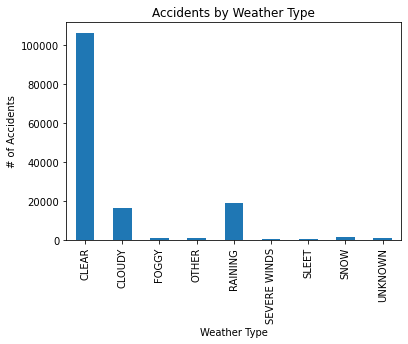

In [21]:
df_county_weather = df_county[df_county['Weather'].notna()]

weatherGroups = df_county_weather.groupby("Weather")

weather_Reports = weatherGroups['Report Number'].count()



chart1 = weather_Reports.plot(kind="bar", title="Accidents by Weather Type")
chart1.set_xlabel("Weather Type")
chart1.set_ylabel("# of Accidents")

In [ ]:
df_state.head()

In [5]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878343 entries, 0 to 878342
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   878343 non-null  int64  
 1   QUARTER                878343 non-null  object 
 2   LIGHT_DESC             841025 non-null  object 
 3   LIGHT_CODE             878343 non-null  float64
 4   COUNTY_DESC            878329 non-null  object 
 5   COUNTY_NO              878329 non-null  float64
 6   MUNI_DESC              0 non-null       float64
 7   MUNI_CODE              659957 non-null  float64
 8   JUNCTION_DESC          760119 non-null  object 
 9   JUNCTION_CODE          791512 non-null  float64
 10  COLLISION_TYPE_DESC    878343 non-null  object 
 11  COLLISION_TYPE_CODE    878343 non-null  int64  
 12  SURF_COND_DESC         789107 non-null  object 
 13  SURF_COND_CODE         791512 non-null  float64
 14  LANE_CODE              668083 non-nu

In [ ]:
df_nonmotor.head()

In [6]:
df_nonmotor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5131 entries, 0 to 5130
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Report Number                     5131 non-null   object 
 1   Local Case Number                 5131 non-null   int64  
 2   Agency Name                       5131 non-null   object 
 3   ACRS Report Type                  5131 non-null   object 
 4   Crash Date/Time                   5131 non-null   object 
 5   Route Type                        3928 non-null   object 
 6   Road Name                         3993 non-null   object 
 7   Cross-Street Type                 3928 non-null   object 
 8   Cross-Street Name                 3992 non-null   object 
 9   Off-Road Description              1138 non-null   object 
 10  Municipality                      565 non-null    object 
 11  Related Non-Motorist              5131 non-null   object 
 12  Collis

## Data Cleaning

## Data Visualization

## Conclusion